# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

Our goal will be to predict the price of a property using various features.

In [2]:
# !kaggle datasets download -d dansbecker/melbourne-housing-snapshot

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: >

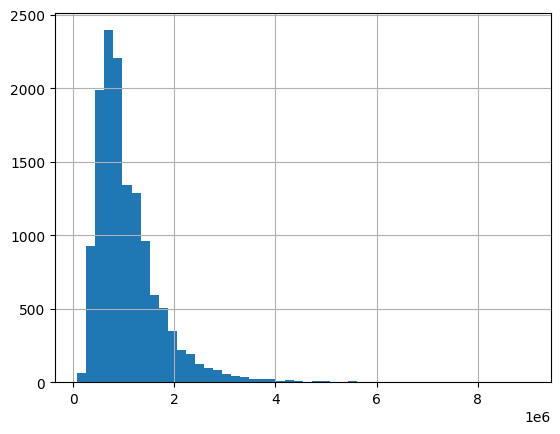

In [61]:
df['Price'].hist(bins=50)

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In order to simplify this problem, let's keep only a subset of the columns.

In [5]:
df = df[['Rooms','Price','Distance','Type','Lattitude','Longtitude','BuildingArea']]
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea
0,2,1480000.0,2.5,h,-37.7996,144.9984,NaN
1,2,1035000.0,2.5,h,-37.8079,144.9934,79.0
2,3,1465000.0,2.5,h,-37.8093,144.9944,150.0
3,3,850000.0,2.5,h,-37.7969,144.9969,NaN
4,4,1600000.0,2.5,h,-37.8072,144.9941,142.0


# Basic cleaning

In [6]:
df.isna().sum()

Rooms              0
Price              0
Distance           0
Type               0
Lattitude          0
Longtitude         0
BuildingArea    6450
dtype: int64

In [7]:
df.loc[:,"BuildingArea"] = df["BuildingArea"].median()

In [8]:
df.isna().sum()

Rooms           0
Price           0
Distance        0
Type            0
Lattitude       0
Longtitude      0
BuildingArea    0
dtype: int64

Let's encode the type, which is a categorical feature.

In [9]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [10]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)

In [12]:
encoding = OH_encoder.fit_transform(df[["Type"]])
encoding

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
OH_encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

In [14]:
cols = pd.DataFrame(encoding, columns=['h', 't', 'u'])
cols

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


In [15]:
df_prepared = df.join(cols).drop(['Type'], axis = 1)
df_prepared

,Rooms,Price,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,2,1480000.0,2.5,-37.79960,144.99840,126.0,1.0,0.0,0.0
1,2,1035000.0,2.5,-37.80790,144.99340,126.0,1.0,0.0,0.0
2,3,1465000.0,2.5,-37.80930,144.99440,126.0,1.0,0.0,0.0
3,3,850000.0,2.5,-37.79690,144.99690,126.0,1.0,0.0,0.0
4,4,1600000.0,2.5,-37.80720,144.99410,126.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,-37.90562,145.16761,126.0,1.0,0.0,0.0
13576,3,1031000.0,6.8,-37.85927,144.87904,126.0,1.0,0.0,0.0
13577,3,1170000.0,6.8,-37.85274,144.88738,126.0,1.0,0.0,0.0
13578,4,2500000.0,6.8,-37.85908,144.89299,126.0,1.0,0.0,0.0


# Data Split

In [16]:
df_prepared.shape

(13580, 9)

In [17]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

Basic split :

In [29]:
train_set, test_set = train_test_split(df_prepared, test_size=0.2)

In [30]:
X_train = train_set.drop(['Price'], axis = 1)
Y_train = train_set['Price']
X_test = train_set.drop(['Price'], axis = 1)
Y_test = train_set['Price']

In [31]:
X_train.head()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
12152,4,15.5,-37.87896,144.75473,126.0,1.0,0.0,0.0
11307,2,10.1,-37.88414,145.05280,126.0,0.0,0.0,1.0
12763,3,7.3,-37.79235,145.04789,126.0,1.0,0.0,0.0
7053,4,10.6,-37.75510,145.06460,126.0,0.0,0.0,1.0
1837,3,9.3,-37.88980,145.01960,126.0,1.0,0.0,0.0


# Model Definition

In [32]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# Model Training

In [33]:
lin_model.fit(X_train,Y_train)

LinearRegression()

# Model Prediction

In [36]:
y_pred = lin_model.predict(X_test)

In [38]:
y_pred.shape

(10864,)

In [42]:
y_test_np = Y_test.array
y_test_np.shape

(10864,)

# Mean Square Error

In [53]:
MSE = np.mean((y_pred-y_test_np)**2)
MSE

207520995655.16748

In [54]:
MSE = np.mean(y_pred-y_test_np)**2
MSE

2.2971283814829706e-16

In [55]:
np.mean(y_pred-y_test_np)

1.5156280485273987e-08

In [56]:
np.max(y_pred-y_test_np)

2202250.0512591004

In [57]:
np.min(y_pred-y_test_np)

-7764948.415342748

Attention à ne pas tomber dans ce piège ! 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        5.000e+00, 8.000e+00, 3.000e+00, 1.600e+01, 2.800e+01, 1.600e+01,
        3.400e+01, 4.100e+01, 8.200e+01, 1.220e+02, 1.620e+02, 2.480e+02,
        4.850e+02, 1.024e+03, 2.163e+03, 3.128e+03, 2.169e+03, 8.470e+02,
        2.010e+02, 4.500e+01, 1.200e+01, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-7764948.41534275, -7565604.44601071, -7366260.47667867,
        -7166916.50734664, -6967572.5380146 , -6768228.56868256,
        -6568884.59935053, -6369540.63001849, -6170196.66068645,
        -5970852.69135442, -5771508.72202238, -5572164.75269034,
        -5372820.7833583 , -5173476.81402627, -4974132.84469423,
        -4774788.87536219, -4575444.90603016, -4376

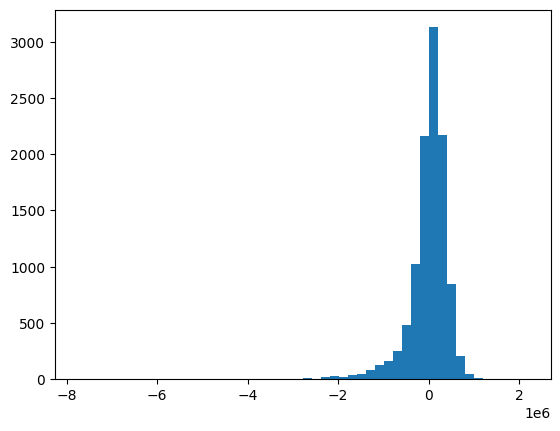

In [60]:
plt.hist(y_pred-y_test_np, bins=50)

# Improvements of data split

<Axes: >

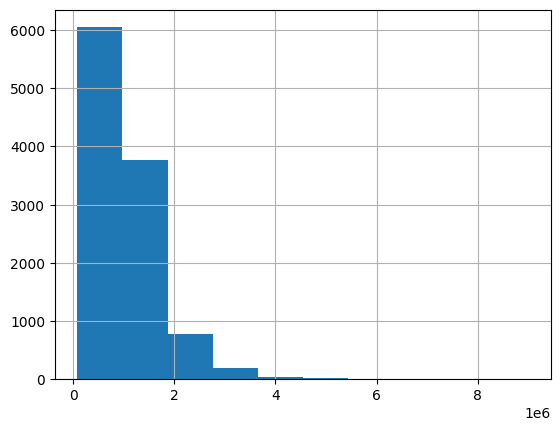

In [22]:
train_set["Price"].hist(bins=10)

<Axes: >

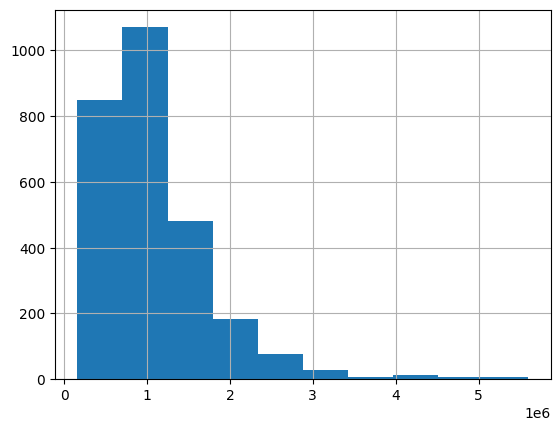

In [23]:
test_set["Price"].hist(bins=10)

Even if the plots are not very detailed, we observe that the distributions are not the same. The original distribution was : 

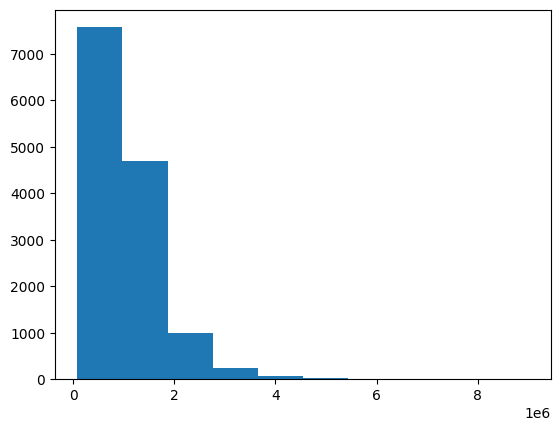

In [24]:
n, bins, _ = plt.hist(df['Price'], bins = 10)

It's closer to the train set distribution. To fix this issue, let's use the StratifiedShuffle splitter. First we need to categorise the data.

In [25]:
bins

array([  85000.,  976500., 1868000., 2759500., 3651000., 4542500.,
       5434000., 6325500., 7217000., 8108500., 9000000.])

In [26]:
bins[-1] = np.inf
bins

array([  85000.,  976500., 1868000., 2759500., 3651000., 4542500.,
       5434000., 6325500., 7217000., 8108500.,      inf])

In [27]:
df["price_cat"] = pd.cut(df["Price"], bins = bins, labels = list(range(10)))
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea,price_cat
0,2,1480000.0,2.5,h,-37.7996,144.9984,126.0,1
1,2,1035000.0,2.5,h,-37.8079,144.9934,126.0,1
2,3,1465000.0,2.5,h,-37.8093,144.9944,126.0,1
3,3,850000.0,2.5,h,-37.7969,144.9969,126.0,0
4,4,1600000.0,2.5,h,-37.8072,144.9941,126.0,1


In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_idx in split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

ValueError: Input y contains NaN.